### TO PREDICT WHETHER A PERSON IS VACCINATED OR NOT

### Importing the packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
### classifiers
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
### model evaluation tools
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [5]:
### data processing functions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  LabelEncoder

In [6]:
import warnings
warnings.filterwarnings("ignore")

### Loading a dataset

In [7]:
data=pd.read_csv("C:/Users/usind/Downloads/Datasets-main/Datasets-main/h1n1_vaccine_prediction.csv")

In [8]:
data.head(5)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [9]:
data.sample(10)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
3719,3719,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,Non-MSA,3.0,2.0,0
19469,19469,2.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,Non-MSA,1.0,3.0,0
19701,19701,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"> $75,000",Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
17858,17858,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,White,Female,NaN,Married,Own,Not in Labor Force,"MSA, Not Principle City",1.0,0.0,0
6606,6606,2.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,Non-MSA,0.0,0.0,0
7400,7400,1.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Hispanic,Female,NaN,Not Married,NaN,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
3185,3185,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4739,4739,1.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,"MSA, Not Principle City",1.0,0.0,0
15128,15128,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"> $75,000",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
23648,23648,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Other or Multiple,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,"MSA, Principle City",1.0,0.0,0


In [10]:
data.shape

(26707, 34)

In [11]:
data.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [12]:
data.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

<Axes: xlabel='marital_status', ylabel='count'>

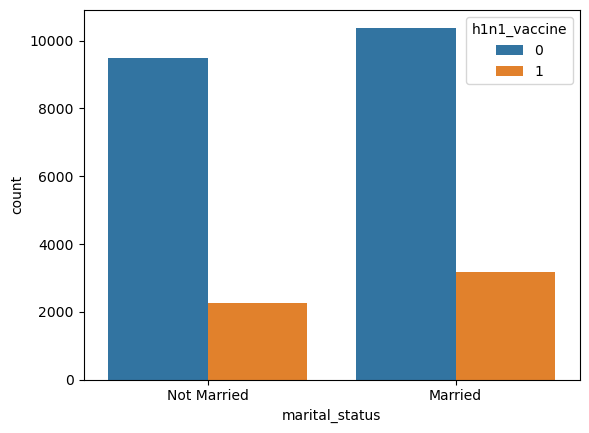

In [14]:
sns.countplot(x="marital_status", hue="h1n1_vaccine", data=data)

<Axes: xlabel='sex', ylabel='count'>

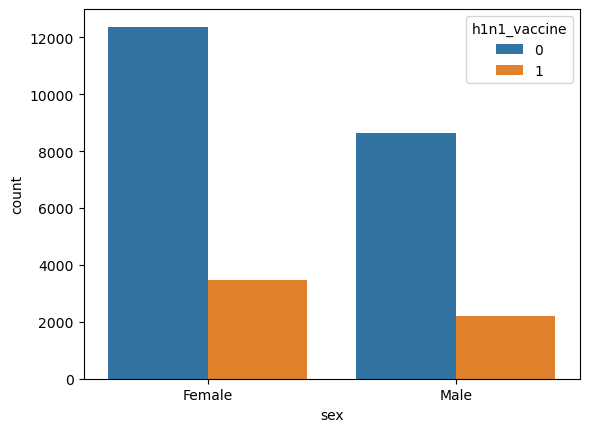

In [15]:
sns.countplot(x="sex", hue="h1n1_vaccine", data=data)

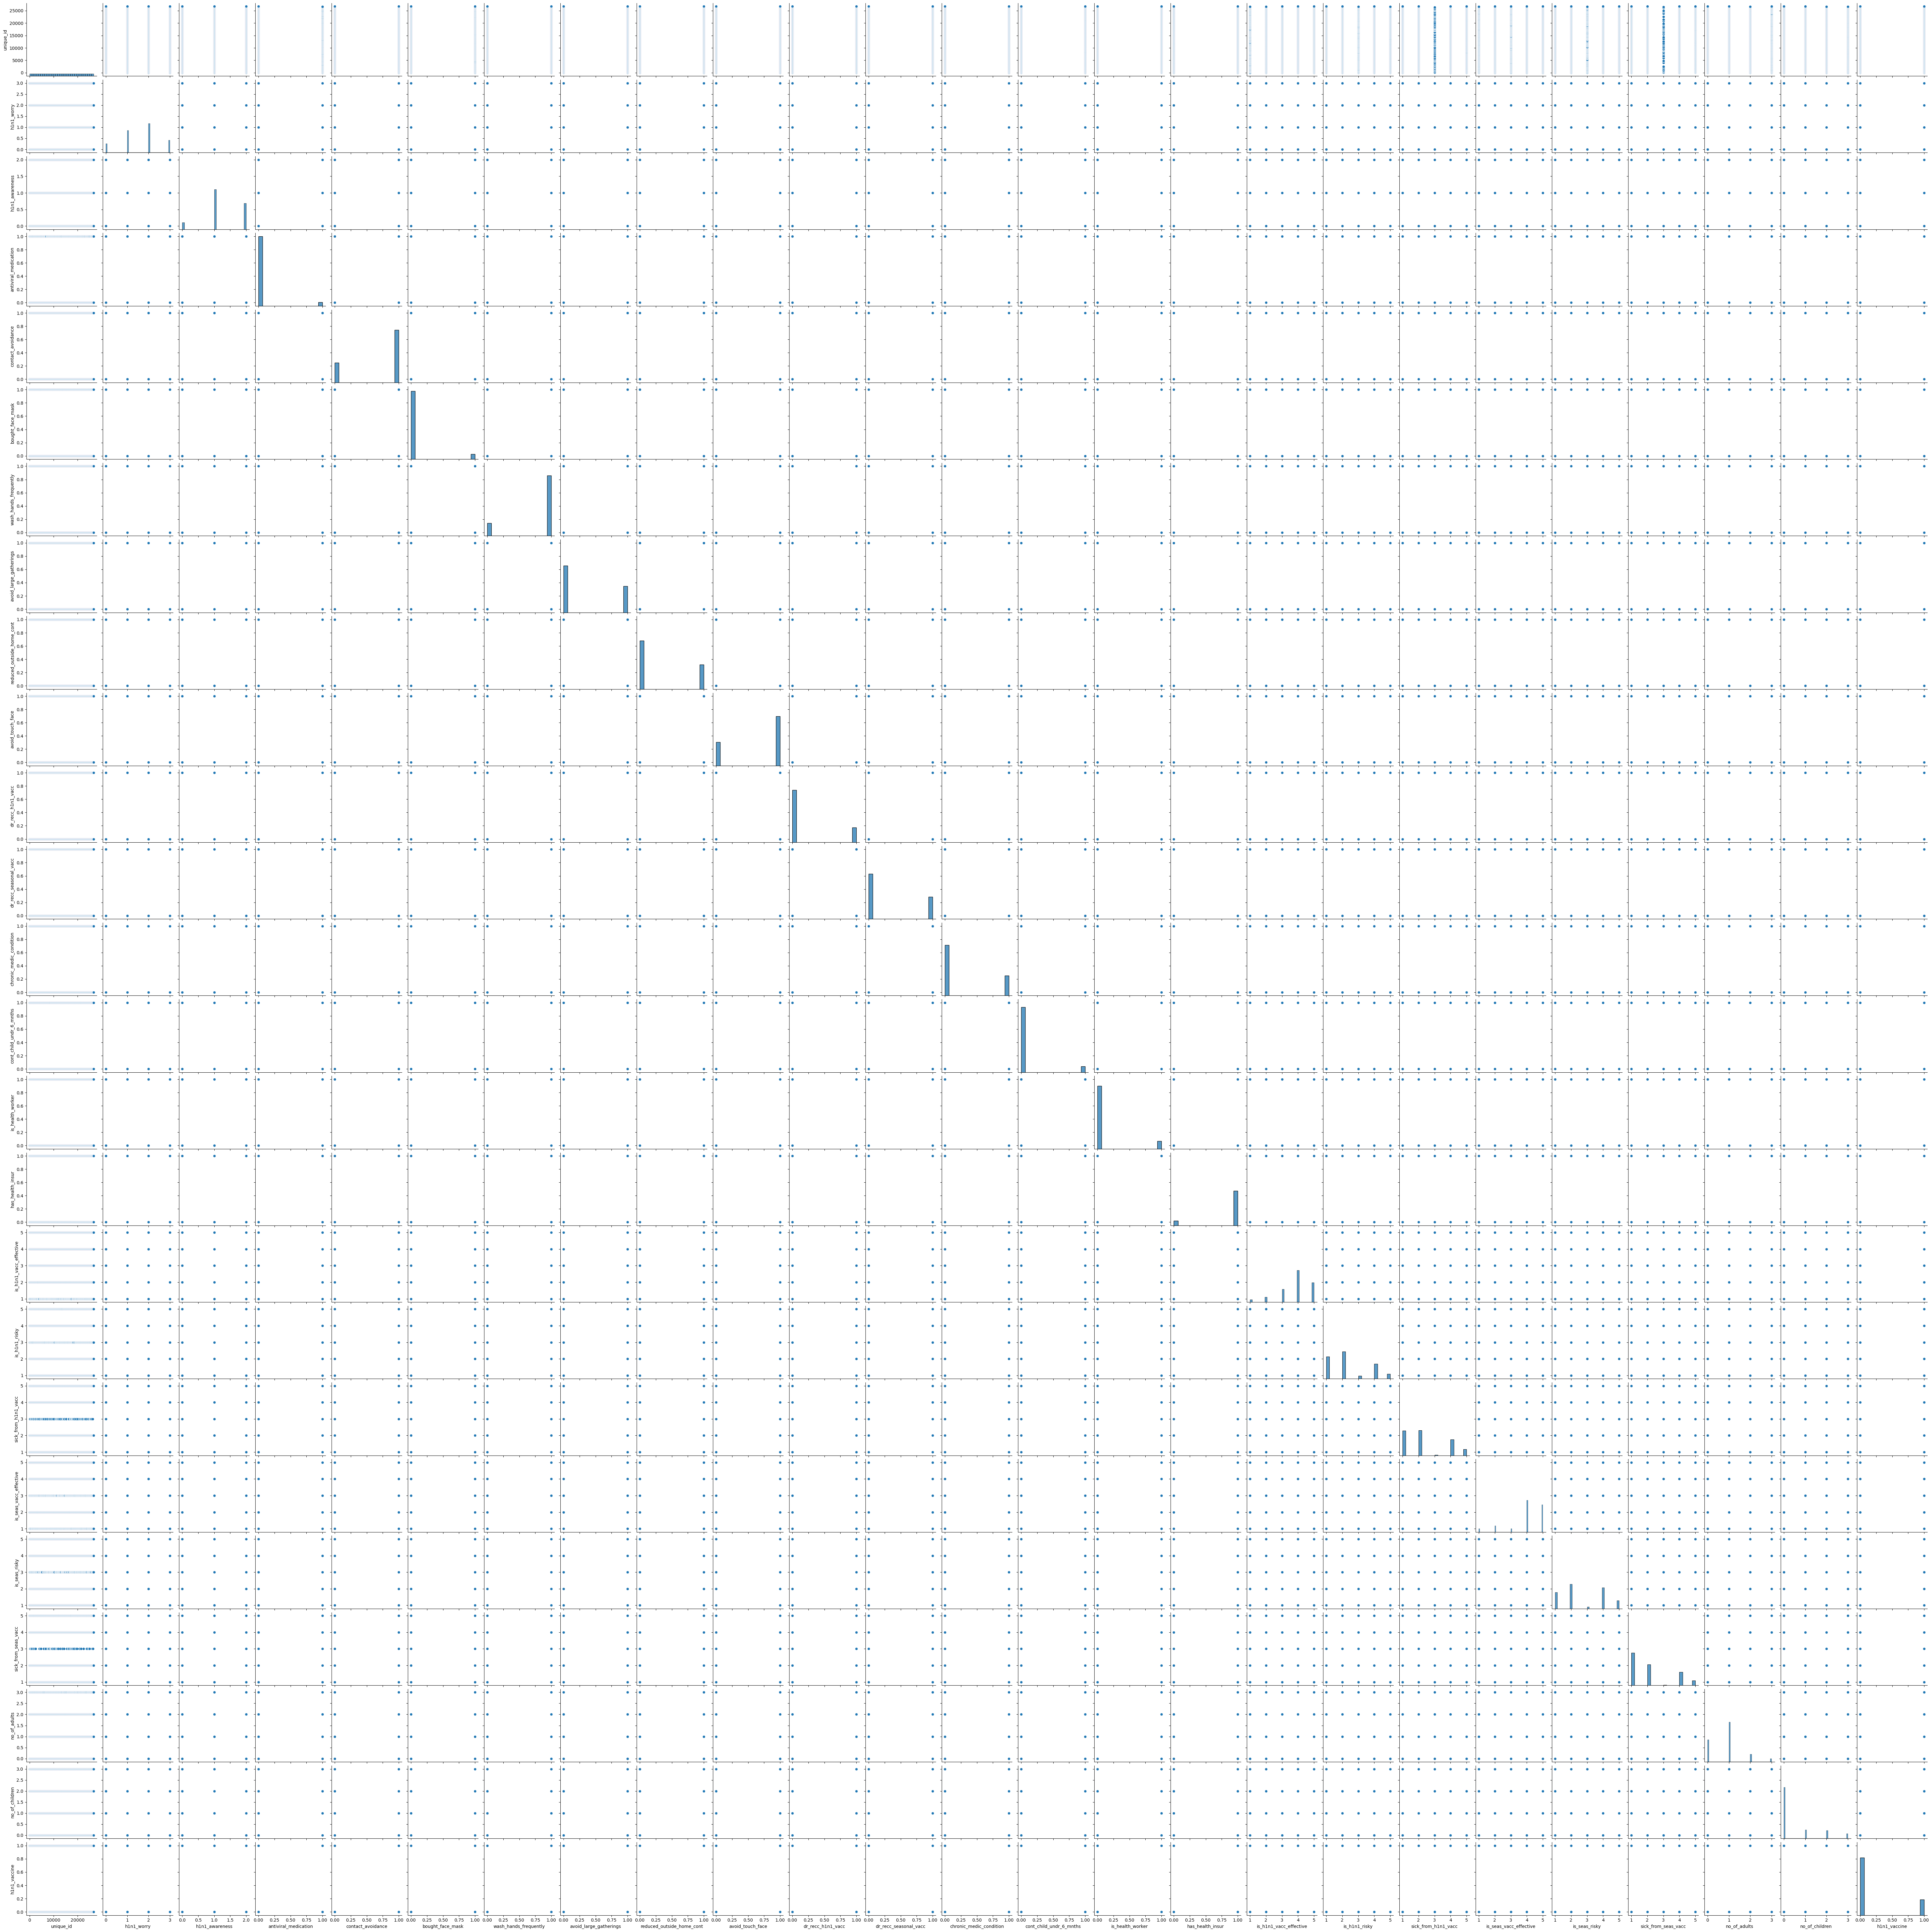

In [16]:
sns.pairplot(data)
plt.show()

In [17]:
# filling null values with respective variable
data["h1n1_worry"].fillna(data["h1n1_worry"].mode()[0],inplace=True)
data["h1n1_awareness"].fillna(data["h1n1_awareness"].mode()[0],inplace=True)
data["antiviral_medication"].fillna(data["antiviral_medication"].mode()[0],inplace=True)
data["contact_avoidance"].fillna(data["contact_avoidance"].mode()[0],inplace=True)
data["bought_face_mask"].fillna(data["bought_face_mask"].mode()[0],inplace=True)
data["wash_hands_frequently"].fillna(data["wash_hands_frequently"].mode()[0],inplace=True)


In [18]:
data["avoid_large_gatherings"].fillna(data["avoid_large_gatherings"].mode()[0],inplace=True)
data["reduced_outside_home_cont"].fillna(data["reduced_outside_home_cont"].mode()[0],inplace=True)
data["avoid_touch_face"].fillna(data["avoid_touch_face"].mode()[0],inplace=True)
data["dr_recc_h1n1_vacc"].fillna(data["dr_recc_h1n1_vacc"].mode()[0],inplace=True)
data["dr_recc_seasonal_vacc"].fillna(data["dr_recc_seasonal_vacc"].mode()[0],inplace=True)
data["chronic_medic_condition"].fillna(data["chronic_medic_condition"].mode()[0],inplace=True)


In [19]:
data["cont_child_undr_6_mnths"].fillna(data["cont_child_undr_6_mnths"].mode()[0],inplace=True)
data["is_health_worker"].fillna(data["is_health_worker"].mode()[0],inplace=True)
data["is_h1n1_vacc_effective"].fillna(data["is_h1n1_vacc_effective"].mode()[0],inplace=True)
data["is_h1n1_risky"].fillna(data["is_h1n1_risky"].mode()[0],inplace=True)
data["sick_from_h1n1_vacc"].fillna(data["sick_from_h1n1_vacc"].mode()[0],inplace=True)
data["is_seas_vacc_effective"].fillna(data["is_seas_vacc_effective"].mode()[0],inplace=True)
data["is_seas_risky"].fillna(data["is_seas_risky"].mode()[0],inplace=True)
data["sick_from_seas_vacc"].fillna(data["sick_from_seas_vacc"].mode()[0],inplace=True)

In [20]:
data["marital_status"]=data["marital_status"].replace('Married',int(1))
data["marital_status"]=data["marital_status"].replace('Not Married',int(0))


In [21]:
mode1=data["marital_status"].mode()
mode1

0    1.0
Name: marital_status, dtype: float64

In [22]:
data["marital_status"].fillna(data["marital_status"].mode()[0],inplace=True)


In [23]:
data["avoid_touch_face"].value_counts()

1.0    18129
0.0     8578
Name: avoid_touch_face, dtype: int64

In [24]:
data["dr_recc_h1n1_vacc"].value_counts()

0.0    21299
1.0     5408
Name: dr_recc_h1n1_vacc, dtype: int64

In [25]:
data["dr_recc_h1n1_vacc"].value_counts()

0.0    21299
1.0     5408
Name: dr_recc_h1n1_vacc, dtype: int64

In [26]:
data["dr_recc_seasonal_vacc"].value_counts()

0.0    18613
1.0     8094
Name: dr_recc_seasonal_vacc, dtype: int64

In [27]:
data["chronic_medic_condition"].value_counts()

0.0    19417
1.0     7290
Name: chronic_medic_condition, dtype: int64

In [28]:
data["cont_child_undr_6_mnths"].value_counts()

0.0    24569
1.0     2138
Name: cont_child_undr_6_mnths, dtype: int64

In [29]:
data["is_health_worker"].value_counts()

0.0    23808
1.0     2899
Name: is_health_worker, dtype: int64

In [30]:
data["is_h1n1_vacc_effective"].value_counts()

4.0    12074
5.0     7166
3.0     4723
2.0     1858
1.0      886
Name: is_h1n1_vacc_effective, dtype: int64

In [31]:
data["is_h1n1_risky"].value_counts()

2.0    10307
1.0     8139
4.0     5394
5.0     1750
3.0     1117
Name: is_h1n1_risky, dtype: int64

In [32]:
data["sick_from_h1n1_vacc"].value_counts()

2.0    9524
1.0    8998
4.0    5850
5.0    2187
3.0     148
Name: sick_from_h1n1_vacc, dtype: int64

In [33]:
data["is_seas_vacc_effective"].value_counts()

4.0    12091
5.0     9973
2.0     2206
1.0     1221
3.0     1216
Name: is_seas_vacc_effective, dtype: int64

In [34]:
data["is_seas_risky"].value_counts()

2.0    9468
4.0    7630
1.0    5974
5.0    2958
3.0     677
Name: is_seas_risky, dtype: int64

In [35]:
data["sick_from_seas_vacc"].value_counts()

1.0    12407
2.0     7633
4.0     4852
5.0     1721
3.0       94
Name: sick_from_seas_vacc, dtype: int64

In [36]:
data.isnull().sum()

unique_id                        0
h1n1_worry                       0
h1n1_awareness                   0
antiviral_medication             0
contact_avoidance                0
bought_face_mask                 0
wash_hands_frequently            0
avoid_large_gatherings           0
reduced_outside_home_cont        0
avoid_touch_face                 0
dr_recc_h1n1_vacc                0
dr_recc_seasonal_vacc            0
chronic_medic_condition          0
cont_child_undr_6_mnths          0
is_health_worker                 0
has_health_insur             12274
is_h1n1_vacc_effective           0
is_h1n1_risky                    0
sick_from_h1n1_vacc              0
is_seas_vacc_effective           0
is_seas_risky                    0
sick_from_seas_vacc              0
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                   0
housing_status      

In [37]:
data["no_of_children"].value_counts()

0.0    18672
1.0     3175
2.0     2864
3.0     1747
Name: no_of_children, dtype: int64

In [38]:
data["no_of_children"].fillna(data["no_of_children"].mode()[0],inplace=True)

In [39]:
data["no_of_adults"].value_counts()

1.0    14474
0.0     8056
2.0     2803
3.0     1125
Name: no_of_adults, dtype: int64

In [40]:
data["no_of_adults"].fillna(data["no_of_adults"].mode()[0],inplace=True)

In [41]:
data["employment"].value_counts()

Employed              13560
Not in Labor Force    10231
Unemployed             1453
Name: employment, dtype: int64

In [42]:
data['employment']=data['employment'].replace({'Employed':1,'Not in Labor Force':2, 'Unemployed':3})

In [43]:
data.sample(5)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
15453,15453,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Female,"<= $75,000, Above Poverty",0.0,Rent,1.0,"MSA, Not Principle City",0.0,1.0,0
592,592,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,Black,Male,Below Poverty,0.0,Rent,2.0,"MSA, Principle City",1.0,3.0,0
6967,6967,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,White,Female,"> $75,000",1.0,Own,1.0,"MSA, Principle City",1.0,0.0,0
8632,8632,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,"<= $75,000, Above Poverty",1.0,Own,2.0,"MSA, Not Principle City",1.0,0.0,0
18071,18071,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,...,Hispanic,Female,"<= $75,000, Above Poverty",0.0,Own,1.0,"MSA, Not Principle City",0.0,0.0,0


In [44]:
data["employment"].fillna(data["employment"].mode()[0],inplace=True)

In [45]:
data["housing_status"].value_counts()

Own     18736
Rent     5929
Name: housing_status, dtype: int64

In [46]:
data['housing_status']=data['housing_status'].replace({'Own':1,'Rent':2})

In [47]:
data["housing_status"].fillna(data["housing_status"].mode()[0],inplace=True)

In [48]:
data.isnull().sum()

unique_id                        0
h1n1_worry                       0
h1n1_awareness                   0
antiviral_medication             0
contact_avoidance                0
bought_face_mask                 0
wash_hands_frequently            0
avoid_large_gatherings           0
reduced_outside_home_cont        0
avoid_touch_face                 0
dr_recc_h1n1_vacc                0
dr_recc_seasonal_vacc            0
chronic_medic_condition          0
cont_child_undr_6_mnths          0
is_health_worker                 0
has_health_insur             12274
is_h1n1_vacc_effective           0
is_h1n1_risky                    0
sick_from_h1n1_vacc              0
is_seas_vacc_effective           0
is_seas_risky                    0
sick_from_seas_vacc              0
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                   0
housing_status      

In [49]:
data["qualification"].value_counts()

College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
Name: qualification, dtype: int64

In [50]:
data['qualification']=data['qualification'].replace({'College Graduate':1,'Some College':2, '12 Years':3, '< 12 Years':4})

In [51]:
data["qualification"].fillna(data["qualification"].mode()[0],inplace=True)

In [52]:
data.isnull().sum()

unique_id                        0
h1n1_worry                       0
h1n1_awareness                   0
antiviral_medication             0
contact_avoidance                0
bought_face_mask                 0
wash_hands_frequently            0
avoid_large_gatherings           0
reduced_outside_home_cont        0
avoid_touch_face                 0
dr_recc_h1n1_vacc                0
dr_recc_seasonal_vacc            0
chronic_medic_condition          0
cont_child_undr_6_mnths          0
is_health_worker                 0
has_health_insur             12274
is_h1n1_vacc_effective           0
is_h1n1_risky                    0
sick_from_h1n1_vacc              0
is_seas_vacc_effective           0
is_seas_risky                    0
sick_from_seas_vacc              0
age_bracket                      0
qualification                    0
race                             0
sex                              0
income_level                  4423
marital_status                   0
housing_status      

In [53]:
data["age_bracket"].value_counts()

65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: age_bracket, dtype: int64

In [54]:
data['age_bracket']=data['age_bracket'].replace({'65+ Years':1,'55 - 64 Years':2, '45 - 54 Years':3, '18 - 34 Years':4, '35 - 44 Years':5})

In [55]:
data["race"].value_counts()

White                21222
Black                 2118
Hispanic              1755
Other or Multiple     1612
Name: race, dtype: int64

In [56]:
data['race']=data['race'].replace({'White':1,'Black':2, 'Hispanic':3, 'Other or Multiple':4})

In [57]:
data["sex"].value_counts()

Female    15858
Male      10849
Name: sex, dtype: int64

In [58]:
data['sex']=data['sex'].replace({'Female':1,'Male':2})

In [59]:
data["income_level"].value_counts()

<= $75,000, Above Poverty    12777
> $75,000                     6810
Below Poverty                 2697
Name: income_level, dtype: int64

In [60]:
data['income_level']=data['income_level'].replace({'<= $75,000, Above Poverty':1,'> $75,000':2, 'Below Poverty':3})

In [61]:
data["income_level"].fillna(data["income_level"].mode()[0],inplace=True)

In [62]:
data["census_msa"].value_counts()

MSA, Not Principle  City    11645
MSA, Principle City          7864
Non-MSA                      7198
Name: census_msa, dtype: int64

In [63]:
data['census_msa']=data['census_msa'].replace({'MSA, Not Principle  City':1,'MSA, Principle City':2, 'Non-MSA':3})

In [64]:
data["no_of_adults"].value_counts()

1.0    14723
0.0     8056
2.0     2803
3.0     1125
Name: no_of_adults, dtype: int64

In [65]:
data=pd.get_dummies(data,columns=['h1n1_awareness'
                                  ,'is_h1n1_vacc_effective',
                                  'is_h1n1_risky','sick_from_h1n1_vacc','is_seas_vacc_effective','is_seas_risky','sick_from_seas_vacc','age_bracket'
                                 ,'income_level','census_msa','no_of_adults','no_of_children'])

In [66]:
data.head(5)

,unique_id,h1n1_worry,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,census_msa_2,census_msa_3,no_of_adults_0.0,no_of_adults_1.0,no_of_adults_2.0,no_of_adults_3.0,no_of_children_0.0,no_of_children_1.0,no_of_children_2.0,no_of_children_3.0
0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,1,1,0,0,0,1,0,0,0
1,1,3.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,0,1,0,0,0,1,0,0,0
2,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,1,0,0,0
3,3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1,0,1,0,0,0,1,0,0,0
4,4,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0,0,0,1,0,0,1,0,0,0


In [67]:
data.columns

Index(['unique_id', 'h1n1_worry', 'antiviral_medication', 'contact_avoidance',
       'bought_face_mask', 'wash_hands_frequently', 'avoid_large_gatherings',
       'reduced_outside_home_cont', 'avoid_touch_face', 'dr_recc_h1n1_vacc',
       'dr_recc_seasonal_vacc', 'chronic_medic_condition',
       'cont_child_undr_6_mnths', 'is_health_worker', 'has_health_insur',
       'qualification', 'race', 'sex', 'marital_status', 'housing_status',
       'employment', 'h1n1_vaccine', 'h1n1_awareness_0.0',
       'h1n1_awareness_1.0', 'h1n1_awareness_2.0',
       'is_h1n1_vacc_effective_1.0', 'is_h1n1_vacc_effective_2.0',
       'is_h1n1_vacc_effective_3.0', 'is_h1n1_vacc_effective_4.0',
       'is_h1n1_vacc_effective_5.0', 'is_h1n1_risky_1.0', 'is_h1n1_risky_2.0',
       'is_h1n1_risky_3.0', 'is_h1n1_risky_4.0', 'is_h1n1_risky_5.0',
       'sick_from_h1n1_vacc_1.0', 'sick_from_h1n1_vacc_2.0',
       'sick_from_h1n1_vacc_3.0', 'sick_from_h1n1_vacc_4.0',
       'sick_from_h1n1_vacc_5.0', 'is_seas_

In [68]:
x=data.drop(["h1n1_vaccine","unique_id","has_health_insur","h1n1_worry","qualification","race","housing_status","employment"],axis=1)
y=data[["h1n1_vaccine"]]

In [69]:
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.30,random_state=0)

### Logistic Regression

In [70]:
model=LogisticRegression()

In [71]:
model.fit(x_train, y_train)

LogisticRegression()

In [72]:
model.score(x_train, y_train)

0.8367925537605649

In [73]:
model.score(x_test, y_test)

0.8301510046174966

In [74]:
predictions=model.predict(x_test)

In [75]:
from sklearn import metrics

<Axes: >

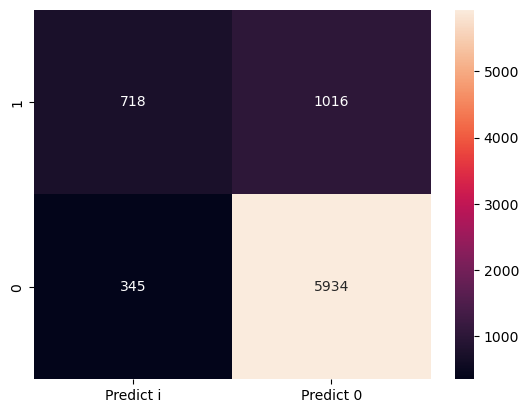

In [76]:
cm=metrics.confusion_matrix(y_test, predictions, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                    columns = [i for i in ["Predict i","Predict 0"]])
sns.heatmap(df_cm, annot=True,fmt='g')

In [77]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      6279
           1       0.68      0.41      0.51      1734

    accuracy                           0.83      8013
   macro avg       0.76      0.68      0.71      8013
weighted avg       0.82      0.83      0.81      8013



### Decision Tree Classifier

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
model_dtc=DecisionTreeClassifier(criterion="entropy",max_depth=6)

In [80]:
model_dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [81]:
model_dtc.score(x_train,y_train)

0.8352412538782497

In [82]:
model_dtc.score(x_test,y_test)

0.8285286409584426

### standardization

In [83]:
from scipy.stats import zscore

In [84]:
xscaled=x.apply(zscore)

In [85]:
x_train , x_test , y_train , y_test = train_test_split(xscaled, y, test_size=0.30,random_state=0)

### Support Vector Classifier

In [86]:
from sklearn.svm import SVC

In [87]:
model_svc=SVC(kernel='linear',random_state=3)

In [88]:
model_svc.fit(x_train,y_train)

SVC(kernel='linear', random_state=3)

In [89]:
model_svc.score(x_train,y_train)

0.8105274419599872

In [90]:
model_svc.score(x_test,y_test)

0.8054411581180582

### Bagging classifier

In [91]:
from sklearn.ensemble import BaggingClassifier

In [92]:
model_bgc=BaggingClassifier(n_estimators=20,base_estimator=model_dtc)

In [93]:
model_bgc.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=6),
                  n_estimators=20)

In [94]:
model_bgc.score(x_train,y_train)

0.8414464534075105

In [95]:
model_bgc.score(x_test,y_test)

0.8318981654810932

### Boosting

In [96]:
from sklearn.ensemble import AdaBoostClassifier

In [97]:
model_bsg=AdaBoostClassifier(n_estimators=10)

In [98]:
model_bsg.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=10)

In [99]:
model_bsg.score(x_train,y_train)

0.8307478335294747

In [100]:
model_bsg.score(x_test,y_test)

0.826407088481218

### Gradient Boost Classifier

In [101]:
from sklearn.ensemble import GradientBoostingClassifier

In [102]:
model_gbc=GradientBoostingClassifier(n_estimators=100)

In [103]:
model_gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [104]:
model_gbc.score(x_train,y_train)

0.8432652187867765

In [105]:
model_gbc.score(x_test,y_test)

0.8362660676400848

### Random Forest Classifier

In [106]:
from sklearn.ensemble import RandomForestClassifier

In [107]:
model_rfc=RandomForestClassifier()

In [108]:
model_rfc.fit(x_train,y_train)

RandomForestClassifier()

In [109]:
model_rfc.score(x_train,y_train)

0.999411575906708

In [110]:
model_rfc.score(x_test,y_test)

0.8279046549357294